# Car Price Prediction EDA

This notebook is the consists of the EDA for this self-learning machine learning exercise to predict car prices given samples of car specs and prices from various manufacturers and models.

## Imports

In [253]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import f_regression,f_classif,f_oneway,\
                                      mutual_info_regression,mutual_info_classif,\
                                      SelectPercentile

## Loading Dataset

In [169]:
# Setting maximum displayable columns of dataframe
pd.options.display.max_columns = 30

In [170]:
cardf = pd.read_csv("Datasets\\Raw Data\\CarPrice_Assignment.csv",index_col=0)

### About the features

|No|Car_ID|Unique id of each observation (Interger)|
|-|-|-|
|1|Car_ID|Unique id of each observation (Interger)|
|2|Symboling|Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) |
|3|carCompany|Name of car company (Categorical)|
|4|fueltype|Car fuel type i.e gas or diesel (Categorical)|
|5|aspiration|Aspiration used in a car (Categorical)|
|6|doornumber|Number of doors in a car (Categorical)|
|7|carbody|body of car (Categorical)|
|8|drivewheel|type of drive wheel (Categorical)|
|9|enginelocation|Location of car engine (Categorical)|
|10|wheelbase|Weelbase of car (Numeric)|
|11|carlength|Length of car (Numeric)|
|12|carwidth|Width of car (Numeric)|
|13|carheight|height of car (Numeric)|
|14|curbweight|The weight of a car without occupants or baggage. (Numeric)|
|15|enginetype|Type of engine. (Categorical)|
|16|cylindernumber|cylinder placed in the car (Categorical)|
|17|enginesize|Size of car (Numeric)|
|18|fuelsystem|Fuel system of car (Categorical)|
|19|boreratio|Boreratio of car (Numeric)|
|20|stroke|Stroke or volume inside the engine (Numeric)|
|21|compressionratio|compression ratio of car (Numeric)|
|22|horsepower|Horsepower (Numeric)|
|23|peakrpm|car peak rpm (Numeric)|
|24|citympg|Mileage in city (Numeric)|
|25|highwaympg|Mileage on highway (Numeric)|
|26|price (Dependent variable)|Price of car (Numeric)|

## First Insights

Our first step is to understand the relationship of each of the features with the car prices.\
So, we will first have to clean up the dataframe first.\
Let's get some initial insights about the raw data.

In [14]:
display(cardf.head());
cardf.shape

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


(205, 25)

In [15]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

No NULL values exist in the dataframe, so dealing with NULL values can be skipped.

But there are two features with inappropriate data type, "doornumber" and "cylindernumber", which is in numbers in words.\
We should convert these two columns to integer dtype later.

## Changing data types

In [190]:
cardf['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [191]:
door_dict = {
    "two":2,
    "four":4
}

In [192]:
cardf['doornumber'] = cardf['doornumber'].apply(lambda x: door_dict[x])

In [193]:
cardf['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [194]:
cylinder_dict = {
    "four":4,
    "six":6,
    "five":5,
    "three":3,
    "twelve":12,
    "two":2,
    "eight":8,
}

In [195]:
cardf['cylindernumber'] = cardf['cylindernumber'].apply(lambda x: cylinder_dict[x])

In [196]:
cardf[['doornumber','cylindernumber']].head()

,doornumber,cylindernumber
car_ID,,
1,2,4
2,2,4
3,2,6
4,4,4
5,4,5


In [197]:
cardf.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
make                 object
dtype: object

## Correlations

Now we can look at how the features correlate with the car prices.\
We will split the features into two types: Numerical and Categorical.

For Numerical Features, we will use pearson correlation and scatter matrix to visualize their relationship with car prices.\
While for Categorical Features, we will use F-Test to tell which one of them is important features and which one isn't.

Finally, we will use a simple Ridge and Lasso Regression to help us in feature selection.

First, we will create lists of the column names in respective category.

In [75]:
cardf.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [81]:
num_cols = cardf.columns[cardf.dtypes.apply(lambda x: True if x == np.int64 or x == np.float64 else False)]

In [87]:
cat_cols = cardf.columns[~cardf.dtypes.apply(lambda x: True if x == np.int64 or x == np.float64 else False)]

In [89]:
len(num_cols),len(cat_cols),cardf.shape

(17, 8, (205, 25))

### Correlation of numerical features

In [104]:
cardf_num_corr = cardf[num_cols].corr()
cardf_num_corr

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173


It's difficult to inspect with all these numbers, we will visualize it with heatmap

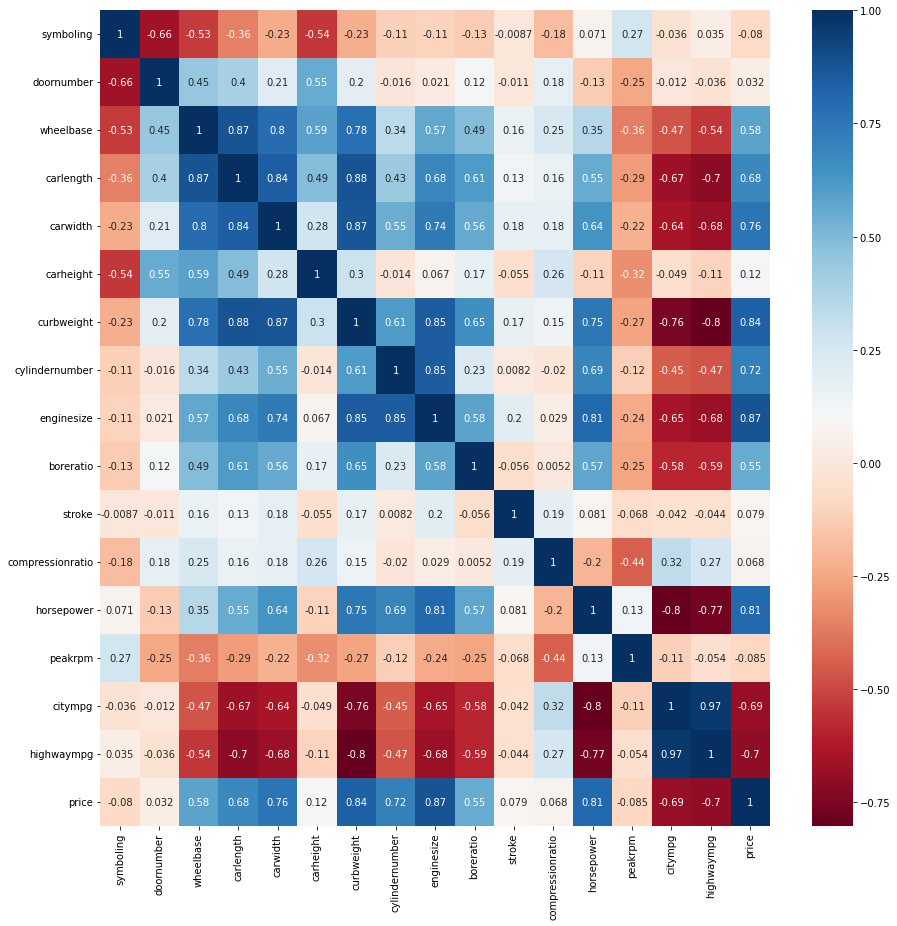

In [106]:
plt.figure(figsize=(15,15))
sns.heatmap(cardf_num_corr,cmap='RdBu',annot=True)
plt.show()

There are a few findings from this correlation plot.

1. wheelbase,carlength,carwidth,curbweight and enginesize seems to be strongly and positively correlate with each others. It would be possible to just use the most representative feature among these to improve the prediction accuracy, we will try this in the later stage when we train our model.
2. curbweight,cylindersize and enginesize are also quite positively correlated to horsepower.
3. citympg and highwaympg heavily correlates with each other (0.97 pearson correlation), it would be better if we combine them into one or keep any one of them to reduce multicollinearity.
4. wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg are correlated with car prices at different extents.

We are about to plot the scatter matrix to visualize the correlations between each of the features with the car prices, so that we dont miss any non-linear correlationship that are unable to be noticed just with pearson correlation.

But due to the large numbers of column, we need to split them into two groups. A group of high linear correlation and another group of which is low.

<Figure size 1152x1152 with 0 Axes>

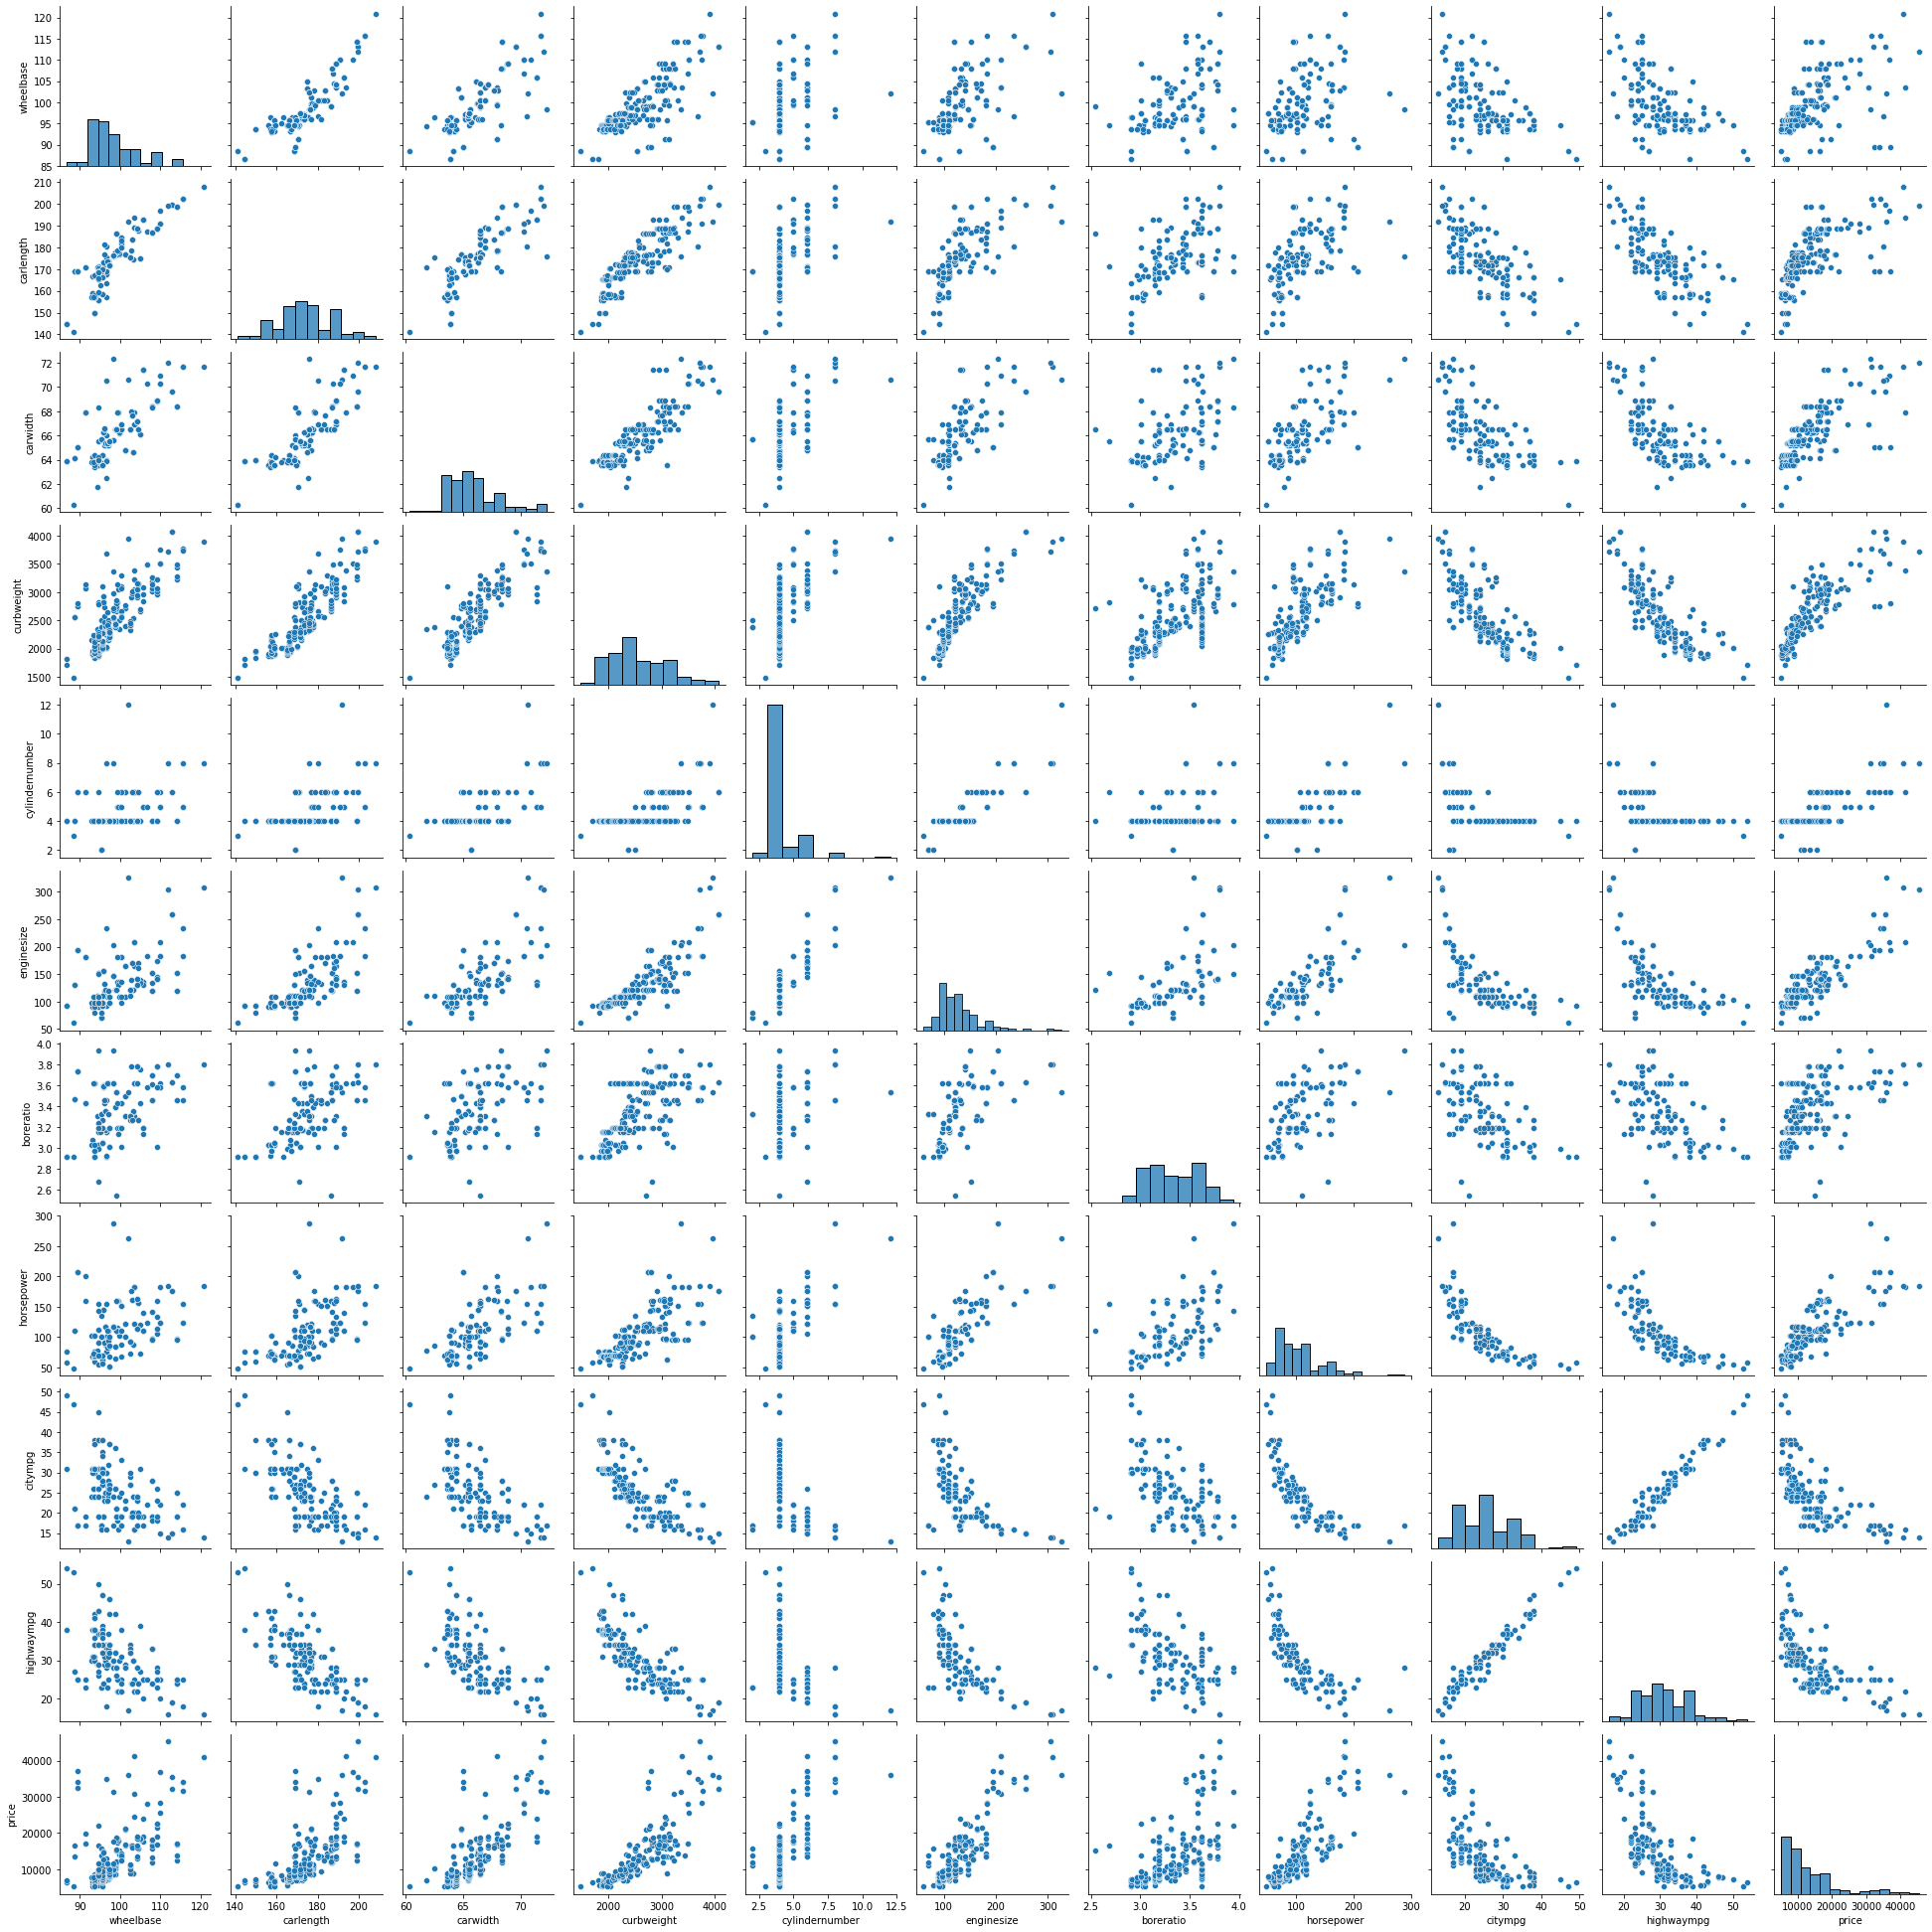

In [102]:
plt.figure(figsize=(16,16))
sns.pairplot(cardf[['wheelbase','carlength','carwidth','curbweight','cylindernumber','enginesize','boreratio','horsepower','citympg','highwaympg','price']])
plt.show()

citympg and highwaympg indeed look very alike to each others.\
wheelbase,carlength,carwidth,curbweight also have very high correlation with each others.

In our feature engineering stage later, we will try to combine these features into one and see if that actually makes our prediction more accurate.

<Figure size 1152x1152 with 0 Axes>

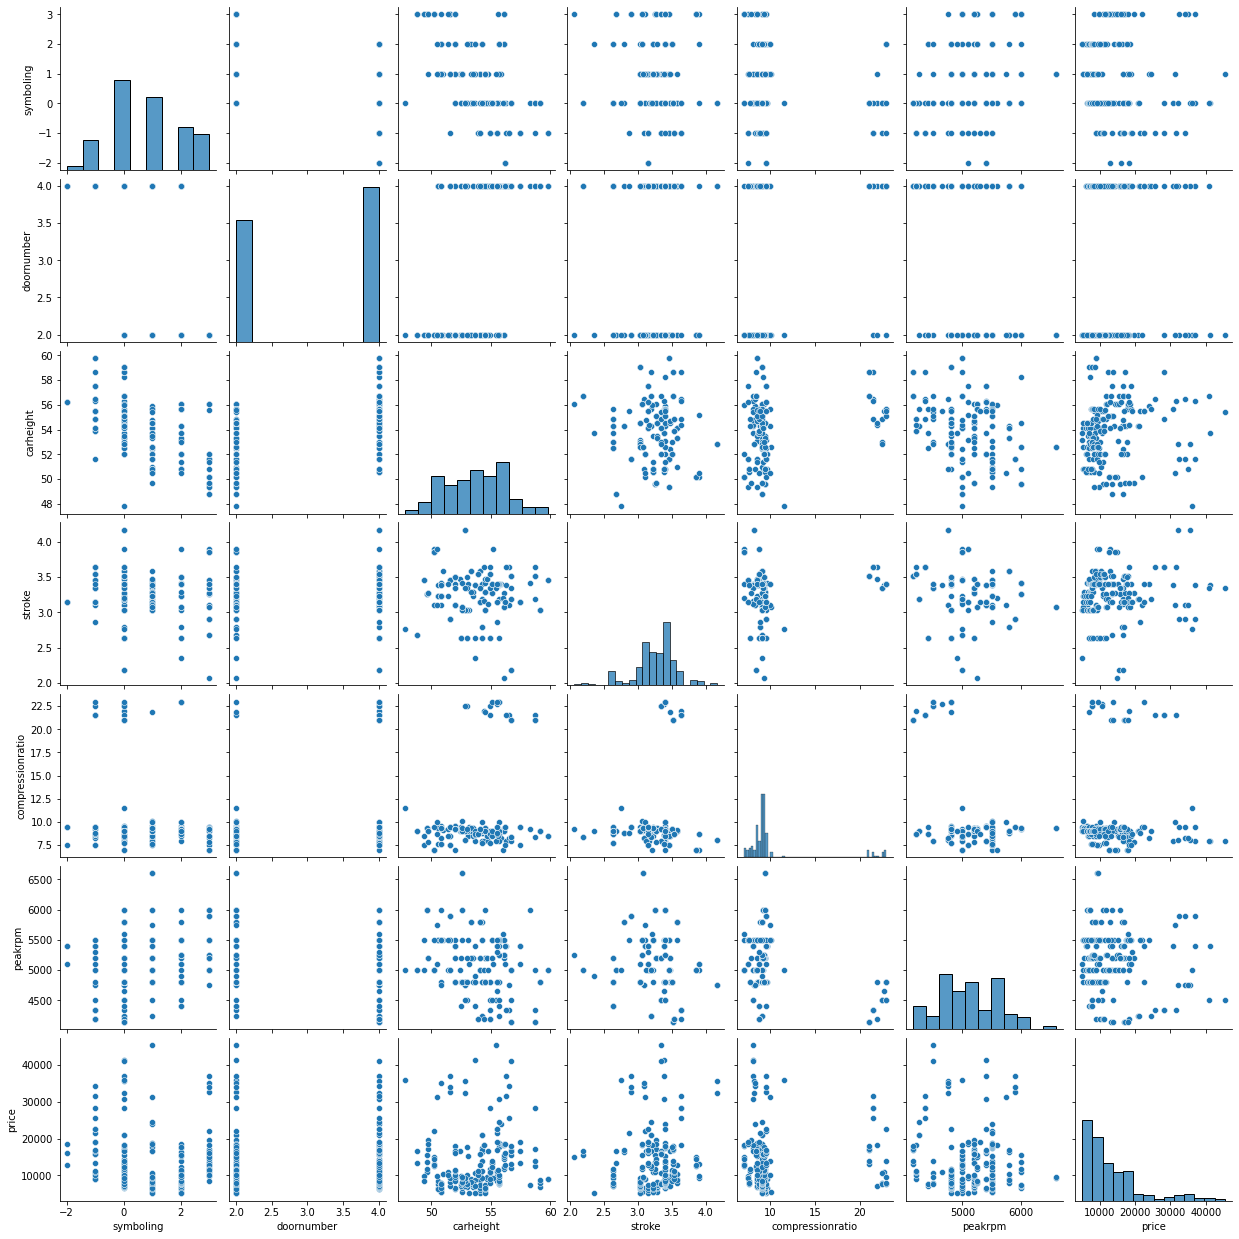

In [103]:
plt.figure(figsize=(16,16))
sns.pairplot(cardf[['symboling','doornumber','carheight','stroke','compressionratio','peakrpm','price']])
plt.show()

Nothing much useful information from the above scatterplot, this further confirm that these features does little to nothing to the price. If the feature selection stage later further proves the uselessness of these features, we will test if the removal of these features actually helps our model in prediction.

In [198]:
fs_num, ps_num = f_regression(cardf[num_cols].loc[:,num_cols != 'price'],cardf['price'])

In [222]:
pd.DataFrame({
    "Features":num_cols[num_cols != 'price'],
    "f-value":fs_num,
    "p-value":ps_num
}).sort_values('p-value',ascending=True).style.bar(['f-value']).highlight_between('p-value',color='red',left=0,right=0.05)

,Features,f-value,p-value
8,enginesize,657.640421,0.000000
6,curbweight,468.594431,0.000000
12,horsepower,382.163409,0.000000
4,carwidth,276.423646,0.000000
7,cylindernumber,216.388502,0.000000
15,highwaympg,192.437464,0.000000
14,citympg,180.203163,0.000000
3,carlength,177.420344,0.000000
2,wheelbase,101.745716,0.000000
9,boreratio,89.507470,0.000000


For the numerical features, a 95% confidence interval of p-value suggests that carheight,peakrpm,symboling,stroke,compressionratio, and doornumber has insignificant effect towards predicting the car price.

In the case of our models accuracy is affected by too many features, we should try removing these few columns.

In [223]:
ms_num = mutual_info_regression(cardf[num_cols].loc[:,num_cols != 'price'],cardf['price'])

In [227]:
pd.DataFrame({
    "Features":num_cols[num_cols != 'price'],
    "mi":ms_num,
}).sort_values('mi',ascending=False).style.bar(['mi'])

,Features,mi
12,horsepower,0.867361
6,curbweight,0.860334
15,highwaympg,0.853652
8,enginesize,0.813503
14,citympg,0.742650
4,carwidth,0.669947
2,wheelbase,0.575953
3,carlength,0.569423
9,boreratio,0.460307
10,stroke,0.363898


The mutual information results generally alligns well with the ANOVA F-test results, except that it shows that stroke is now more correlated with car price, this could be due to non-linear correlation.

### Correlation of categorical features

We will look at these features one by one

In [108]:
cardf[cat_cols].head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
car_ID,,,,,,,,
1,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi
3,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi
4,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi
5,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi


#### CarName

It seems like the CarName is composed of both the manufacturer name and the model name of the car.\
We will extract the manufacturer name from the CarName.\
Due to I can't logically relate the model name with the car prices, so we will ignore the model name of the car.

In [113]:
cardf['CarName'].str.split().apply(lambda x: x[0]).unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

After a round of googling, there seems to be a few typo mistakes as of follows:
1. "mazda" to "maxda"
2. "porsche" to "porcshce"
3. "nissan" and "Nissan"
4. "toyota" to "toyouta"
5. "volkswagen" to "vokswagen"
6. "volkswagen" to "vw"

We will make corrections to the above typo mistakes when extracting the car manufacturer name.

In [122]:
def extract_namufacturer(carname_strs):
    typo_dict = {
        "maxda":"mazda",
        "porcshce":"porsche",
        "toyouta":"toyota",
        "vokswagen":"volkswagen",
        "vw":"volkswagen",
    }
    
    if carname_strs[0] in typo_dict.keys():
        return typo_dict[carname_strs[0]].lower()
    else:
        return carname_strs[0].lower()

In [123]:
cardf['CarName'].str.split().apply(extract_namufacturer).unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [255]:
joblib.dump(cardf['make'].unique(),"System\\make_categories")

['System\\make_categories']

Alright, now it looks better.\
Let's apply it to the cardf and create a new column.\
Then, we will visualize the price of different manufacturers using a boxplot.

In [171]:
cardf['make'] = cardf['CarName'].str.split().apply(extract_namufacturer)

In [ ]:
cat_cols = list(cat_cols) - ['make']

In [178]:
cardf[cat_cols].head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,make
car_ID,,,,,,,,,
1,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
3,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
4,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,audi
5,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,audi


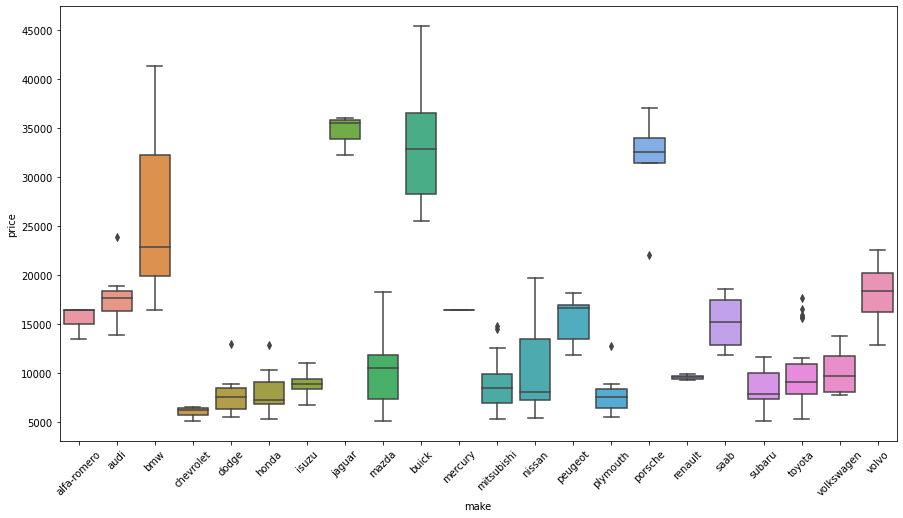

In [141]:
plt.figure(figsize=(15,8))
sns.boxplot(x='make',y='price',data=cardf)
plt.xticks(rotation=45)
plt.show()

From this boxplot of the manufacturer against car price, we can see that there is not too many of long box except for bmw.\
This represents that the manufacturer is quite representative of the price of the car made by them.

As a result we will retain this extracted feature and drop the CarName feature from the cardf later.

#### fueltype

In [147]:
np.array(cat_cols)

array(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem', 'make'], dtype='<U14')

In [145]:
cardf['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

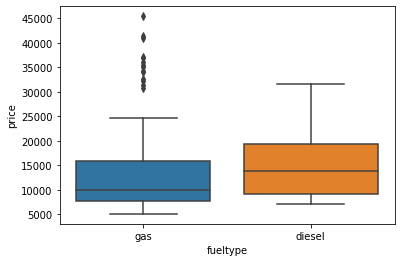

In [151]:
plt.figure(figsize=(6,4))
sns.boxplot(x='fueltype',y='price',data=cardf)
plt.show()

From the plot above, we can see that diesel powered vehicle is generally slightly more expensive than gasoline powered vehicle.\
There are a few outliers for gasoline vehicle where the price is more than 25k.\
Due to the high difference in number of samples for both types, we can't make solid conclusion for this feature.

We will keep this feature for now and only remove this feature if the feature selection later suggests it being not useful.

#### aspiration

In [152]:
cardf['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

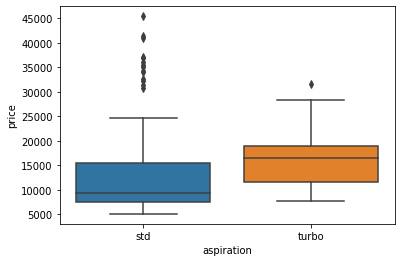

In [153]:
plt.figure(figsize=(6,4))
sns.boxplot(x='aspiration',y='price',data=cardf)
plt.show()

This behaves quite similar to the fueltype in above.\
Turbo aspiration is in generally more expensive than standard aspiration.\
However, there are outliers in standard aspiration where the price is a lot higher than turbo aspiration.

#### carbody

In [154]:
cardf['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

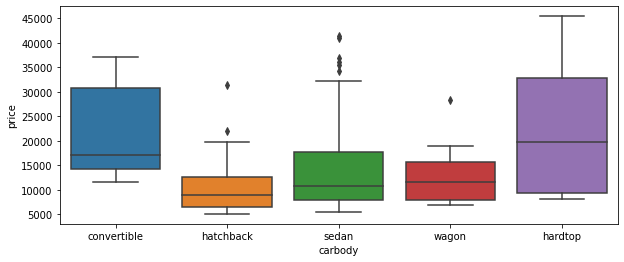

In [155]:
plt.figure(figsize=(10,4))
sns.boxplot(x='carbody',y='price',data=cardf)
plt.show()

convertible and hardtop carbody is on average, higher price than other types of carbody

#### drivewheel

In [156]:
cardf['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

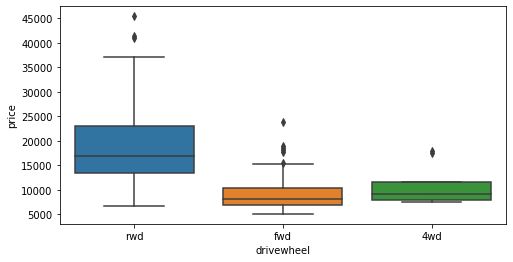

In [158]:
plt.figure(figsize=(8,4))
sns.boxplot(x='drivewheel',y='price',data=cardf)
plt.show()

Rear wheeled vehicle tends is obviously more expensive than the other two types of vehicle.\
This feature should be helpful in predicting the price of the car.

#### enginelocation

In [159]:
cardf['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

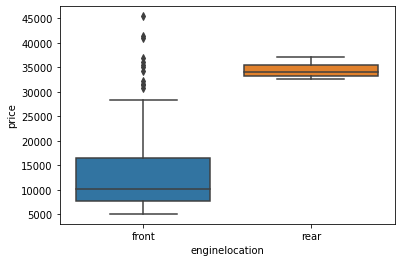

In [160]:
plt.figure(figsize=(6,4))
sns.boxplot(x='enginelocation',y='price',data=cardf)
plt.show()

Although we have only three samples for the rear engine location vehicle, but it shows that it is highly likely that rear engine vehicle is more expensive than majority of front engine vehicle.\
This may not be a very helpful feature as of now due to the lack of samples for rear engine vehicle.\
We either need more samples or remove this feature if it can improve the accuracy.

#### enginetype

In [161]:
cardf['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

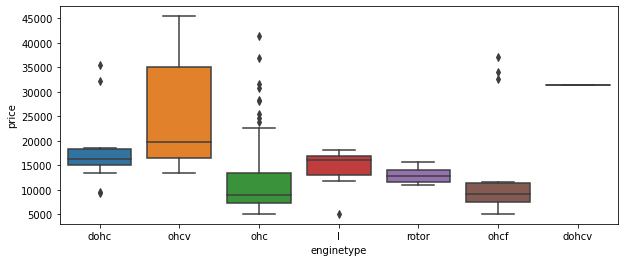

In [163]:
plt.figure(figsize=(10,4))
sns.boxplot(x='enginetype',y='price',data=cardf)
plt.show()

We can only see that ohcv engine type is more expensive than others, but ohcv only has 13 samples.\
We are not able to give solid conclusion as of now.

#### fuelsystem

In [164]:
cardf['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

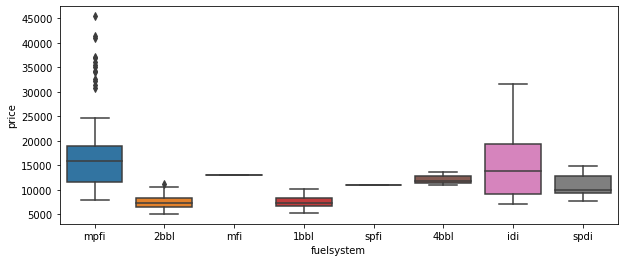

In [165]:
plt.figure(figsize=(10,4))
sns.boxplot(x='fuelsystem',y='price',data=cardf)
plt.show()

We can only see that ohcv engine type is more expensive than others, but ohcv only has 13 samples.\
We are not able to give solid conclusion as of now.

In [231]:
np.array(cat_cols)[np.array(cat_cols) != 'CarName']

array(['fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem', 'make'], dtype='<U14')

In [233]:
cardf.loc[:,np.array(cat_cols)[np.array(cat_cols) != 'CarName']]

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,make
car_ID,,,,,,,,
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
3,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
4,gas,std,sedan,fwd,front,ohc,mpfi,audi
5,gas,std,sedan,4wd,front,ohc,mpfi,audi
...,...,...,...,...,...,...,...,...
201,gas,std,sedan,rwd,front,ohc,mpfi,volvo
202,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo
203,gas,std,sedan,rwd,front,ohcv,mpfi,volvo


In [235]:
cardf_cat_oh = pd.get_dummies(cardf.loc[:,np.array(cat_cols)[np.array(cat_cols) != 'CarName']],sparse=False)
cardf_cat_oh.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,...,make_isuzu,make_jaguar,make_mazda,make_mercury,make_mitsubishi,make_nissan,make_peugeot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [236]:
fs_cat,ps_cat = f_regression(cardf_cat_oh,cardf['price'])

In [237]:
pd.DataFrame({
    "Features":cardf_cat_oh.columns.values,
    "f-value":fs_cat,
    "p-value":ps_cat
}).sort_values('p-value',ascending=True).style.bar(['f-value']).highlight_between('p-value',color='red',left=0,right=0.05)

,Features,f-value,p-value
11,drivewheel_rwd,140.059236,0.000000
10,drivewheel_fwd,115.353549,0.000000
26,fuelsystem_mpfi,74.082624,0.000000
32,make_buick,73.311482,0.000000
22,fuelsystem_2bbl,68.164246,0.000000
19,enginetype_ohcv,35.539883,0.000000
44,make_porsche,30.145299,0.000000
17,enginetype_ohc,27.295010,0.000000
37,make_jaguar,24.151792,0.000002
13,enginelocation_rear,23.969740,0.000002


In [238]:
ms_cat = mutual_info_regression(cardf_cat_oh,cardf['price'])

In [240]:
pd.DataFrame({
    "Features":cardf_cat_oh.columns.values,
    "mi":ms_cat,
}).sort_values('mi',ascending=False).style.bar(['mi'])

,Features,mi
22,fuelsystem_2bbl,0.328044
26,fuelsystem_mpfi,0.319108
10,drivewheel_fwd,0.318465
11,drivewheel_rwd,0.317049
32,make_buick,0.104320
17,enginetype_ohc,0.102343
2,aspiration_std,0.096986
3,aspiration_turbo,0.096986
6,carbody_hatchback,0.076394
42,make_peugeot,0.071876


### ANOVA F-Test and Mutual Information

In our initial trial of training a model, we will not perform any feature selection and train the model with all features.\
If the result satisfies us and the efficiency of the model is acceptable, we will not perform any feature selection as it only brings little to no benefits.